# Multivocal Literature Review - Systematic Literature Review Data Analysis
This notebook shows how to use litstudy from inside a Jupyter notebook. It shows how to load a dataset, plot statistics, perform topic modeling, do network analysis, and some more advanced features.

This notebook focuses on the topic of federated DT.

# Imports Selected Studies

In [1]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import re

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [2]:
from datetime import datetime

currentDateAndTime = datetime.now()
filename = (f'SOTA_SECO_CPS_{currentDateAndTime.year}-{currentDateAndTime.month}-{currentDateAndTime.day}'
            f'_{currentDateAndTime.hour}-{currentDateAndTime.minute}-{currentDateAndTime.second}')
filename_xlsx = (f'SOTA_SECO_CPS_{currentDateAndTime.year}-{currentDateAndTime.month}-{currentDateAndTime.day}'
            f'_{currentDateAndTime.hour}-{currentDateAndTime.minute}-{currentDateAndTime.second}.xlsx')

print(filename)

SOTA_SECO_CPS_2024-10-10_12-26-0


In [3]:
############################## LOAD Cleaned papers ###################################

# with open('AAA/studies.txt', 'r') as file:
#     data = file.read().splitlines()
#     print(data)
    
# Load csv file
docs_bib = litstudy.load_scopus_csv('Results/SOTA_SECO_CPS_2024-10-10_11-51-20_00_Venue_OK.csv')
print(len(docs_bib), 'papers loaded from selected papers list')

330 papers loaded from selected papers list


In [4]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

docs_found_scopus, docs_notfound_scopus = litstudy.refine_scopus(docs_bib)

 82%|████████▏ | 272/330 [00:00<00:00, 394.90it/s]C:\Users\vitto\anaconda3\lib\site-packages\litstudy\sources\scopus.py:230: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(f"no document found for DOI {doi}: {e}")
100%|██████████| 330/330 [00:02<00:00, 116.40it/s]


In [5]:
print(len(docs_found_scopus), 'papers found on Scopus')
print(len(docs_notfound_scopus), 'papers were not found')
docs_bib_scopus = docs_found_scopus | docs_notfound_scopus
len(docs_bib_scopus)

311 papers found on Scopus
19 papers were not found


330

In [6]:
docs_bib = docs_bib_scopus # docs_bib_scopus | docs_bib_SemanticScholar | docs_bib_CrossRef
docs_filtered = docs_bib # .filter_docs(lambda d: d.publication_year >= 1990)

# Selected Paper Analysis
Litstudy analysis

      Frequency
1992          1
1993          0
1994          1
1995          0
1996          0
1997          1
1998          0
1999          1
2000          0
2001          1
2002          0
2003          1
2004          2
2005          0
2006          0
2007          2
2008          2
2009          4
2010          4
2011          0
2012          2
2013          3
2014          2
2015          1
2016          6
2017          5
2018         12
2019         23
2020         31
2021         35
2022         61
2023         76
2024         53


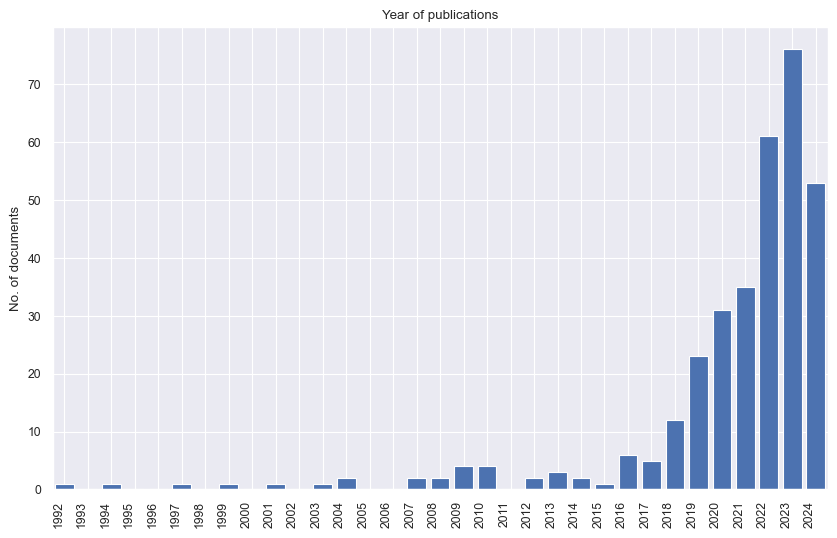

In [7]:
pdStatYear = litstudy.stats.compute_year_histogram(docs_filtered)
print(pdStatYear)

#plt.figure(1)
litstudy.plot_year_histogram(docs_filtered, vertical=True);
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('')
plt.grid(True)
plt.savefig('Results/' + str(filename) + '_01_plot_year_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

C:\Users\vitto\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    index  Frequency Journal Conference Workshop Book Symposium Forum
0    1992          1       1          0        0    0         0     0
1    1993          0       0          0        0    0         0     0
2    1994          1       0          0        0    0         0     0
3    1995          0       0          0        0    0         0     0
4    1996          0       0          0        0    0         0     0
5    1997          1       1          0        0    0         0     0
6    1998          0       0          0        0    0         0     0
7    1999          1       0          0        0    1         0     0
8    2000          0       0          0        0    0         0     0
9    2001          1       0          0        1    0         0     0
10   2002          0       0          0        0    0         0     0
11   2003          1       1          0        0    0         0     0
12   2004          2       1          0        0    0         0     0
13   2005          0

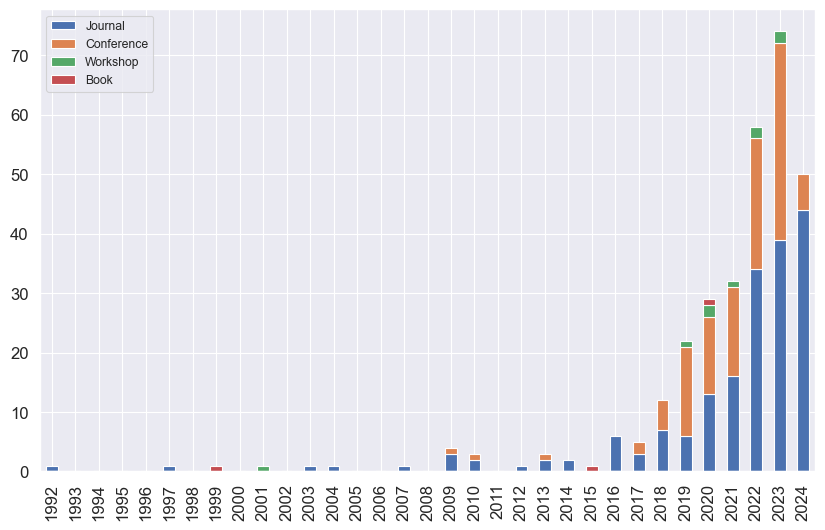

In [8]:
pdStatYear = litstudy.stats.compute_year_histogram(docs_filtered)
# print(pdStatYear)
pdStatYear["Journal"] = ""
pdStatYear["Conference"] = ""
pdStatYear["Workshop"] = ""
pdStatYear["Book"] = ""
pdStatYear["Symposium"] = ""
pdStatYear["Forum"] = ""
#for ind in pdStatYear.index:
#    print(pdStatYear[][ind], df['Frequency'][ind])
pdStatYear2 = pdStatYear.reset_index()
# print(pdStatYear2)
#df2 = pdStatYear2[pdStatYear2.columns[0]]
# print(pdStatYear2["index"][3])

# loop through the rows using iterrows()
for index, row in pdStatYear2.iterrows():
    # print(row['index'], row['Frequency'])
    
    docs_journal = docs_bib.filter_docs(lambda d: (d.source_type == 'Journal'  or d.id.doi == '10.1007/978-3-319-46508-1_13') 
                                        and d.publication_year == row['index'])
    # print(len(docs_journal))
    pdStatYear2.loc[index,'Journal'] = len(docs_journal)
    
    pattern_conf = ['conference','symposium','lecture notes','congress','Design, Automation and Test in Europe']
    docs_conf = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                      d.id.doi == '10.24251/HICSS.2017.569') and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     ( re.search(pattern_conf[0],str(d.publication_source),re.IGNORECASE) or 
                                       re.search(pattern_conf[1],str(d.publication_source),re.IGNORECASE) or 
                                       re.search(pattern_conf[2],str(d.publication_source),re.IGNORECASE) or
                                       re.search(pattern_conf[4],str(d.publication_source),re.IGNORECASE)  or
                                       re.search('studies',str(d.publication_source),re.IGNORECASE) or
                                        docs_filtered[index].id.doi == '10.1007/978-3-031-16088-2_4' or
                                        docs_filtered[index].id.doi == '10.1109/DEST.2010.5610662' or
                                       re.search('Event-Driven Interoperable Manufacturing Ecosystem for Energy Consumption Monitoring',str(docs_filtered[index].title),re.IGNORECASE) or
                                       re.search('forum',str(d.publication_source),re.IGNORECASE) ) and
                                       (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('companion',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('MODELS-C',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('ICSA-C',str(d.publication_source),re.IGNORECASE)) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Conference'] = len(docs_conf)
    
    doc_workshop = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' ) and 
                                            d.publication_year == row['index'] and 
                                            (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                            (re.search('workshop',str(d.publication_source),re.IGNORECASE) or
                                             re.search('seminar',str(d.publication_source),re.IGNORECASE) or                                          
                                             re.search('2021 Design, Automation and Test in Europe Conference and Exhibition, DATE 2021',str(d.publication_source),re.IGNORECASE) or
                                             re.search('companion',str(d.publication_source),re.IGNORECASE) or 
                                             re.search('MODELS-C',str(d.publication_source),re.IGNORECASE) or 
                                             re.search('ICSA-C',str(d.publication_source),re.IGNORECASE) ) )
    
    # indexPP = 0
    # while indexPP < len(doc_workshop):
        # print(doc_workshop[indexPP].title)
        # print(doc_workshop[indexPP].source_type)
    #     indexPP += 1
    
    # print(len(doc_book_series))
    pdStatYear2.loc[index,'Workshop'] = len(doc_workshop)
    doc_book = docs_bib.filter_docs(lambda d: d.source_type == 'Book' and d.publication_year == row['index'])
    # print(len(doc_book))
    pdStatYear2.loc[index,'Book'] = len(doc_book)
    
    pattern_symp = ['symposium','']
    docs_symp = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                d.id.doi == '10.24251/HICSS.2017.569')
                                     and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     re.search(pattern_symp[0],str(d.publication_source),re.IGNORECASE) and
                                     (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                     (not re.search('conference',str(d.publication_source),re.IGNORECASE)) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Symposium'] = len(docs_symp)
                                     
    pattern_forum = ['forum','']
    docs_forum = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                d.id.doi == '10.24251/HICSS.2017.569') and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     re.search(pattern_forum[0],str(d.publication_source),re.IGNORECASE) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Forum'] = len(docs_forum)
    
#
print(pdStatYear2)
print('\n')
print('Journal:',pdStatYear2['Journal'].sum())
print('Conference:',pdStatYear2['Conference'].sum())
print('Workshop:',pdStatYear2['Workshop'].sum())
print('Book:',pdStatYear2['Book'].sum())
print('Total:',pdStatYear2['Journal'].sum()+pdStatYear2['Conference'].sum()+pdStatYear2['Workshop'].sum()+pdStatYear2['Book'].sum())
print('\n')
print('Symposium:',pdStatYear2['Symposium'].sum())
print('Forum:',pdStatYear2['Forum'].sum())
print('\n')

# plt.figure(2)
# fig, ax = plt.subplots()
pdStatYear2.plot.bar(x='index', y=['Journal','Conference','Workshop','Book'], xlabel='', stacked=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('')
plt.grid(True)

"""
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
"""

plt.savefig('Results/' + str(filename) + '_02_plot_year_type_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

In [9]:
import re

index = 0
while index < len(docs_filtered):
    for author in docs_filtered[index].authors or []:
        re.sub(r'[\(\[].*?[\)\]]', '', str(author.name))
    index += 1

pdStatAuthors = litstudy.stats.compute_author_histogram(docs_filtered)

pdStatAuthors

,Frequency
Lv Z. (AUID: 55925162500),5
Lv H. (AUID: 57020785300),5
Nnaji C.A. (AUID: 57204873792),4
Adebayo O.M. (AUID: 57194329853),3
Mahesh P.A. (AUID: 57202421244),3
...,...
Golec J.E. (AUID: 57203502848),1
Dünner R. (AUID: 23469316500),1
Chuss D.T. (AUID: 6602350221),1
Espinoza F. (AUID: 57223977336),1


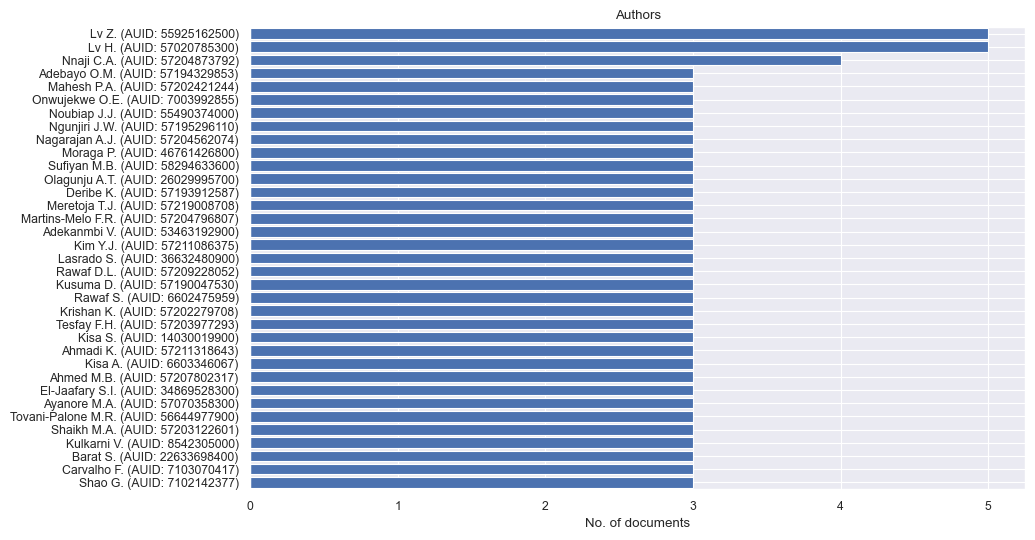

In [10]:
plt.figure(3)
litstudy.plot_author_histogram(docs_filtered, stacked=True, limit=35)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('')
plt.grid(True)
plt.savefig('Results/' + str(filename) + '_03_plot_authors_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

,Frequency
Winter Simulation Conference WSC,24
ACM Computing Surveys,18
ACM IEEE International Conference on Model Driven Engineering Languages and Systems MODELS C,10
IEEE Access,8
Remote Sensing,7
...,...
Geoinformation Week Broadening Geospatial Science and Technology,1
Journal of Supercomputing,1
Ecological Modelling,1
Journal of Infection and Chemotherapy,1


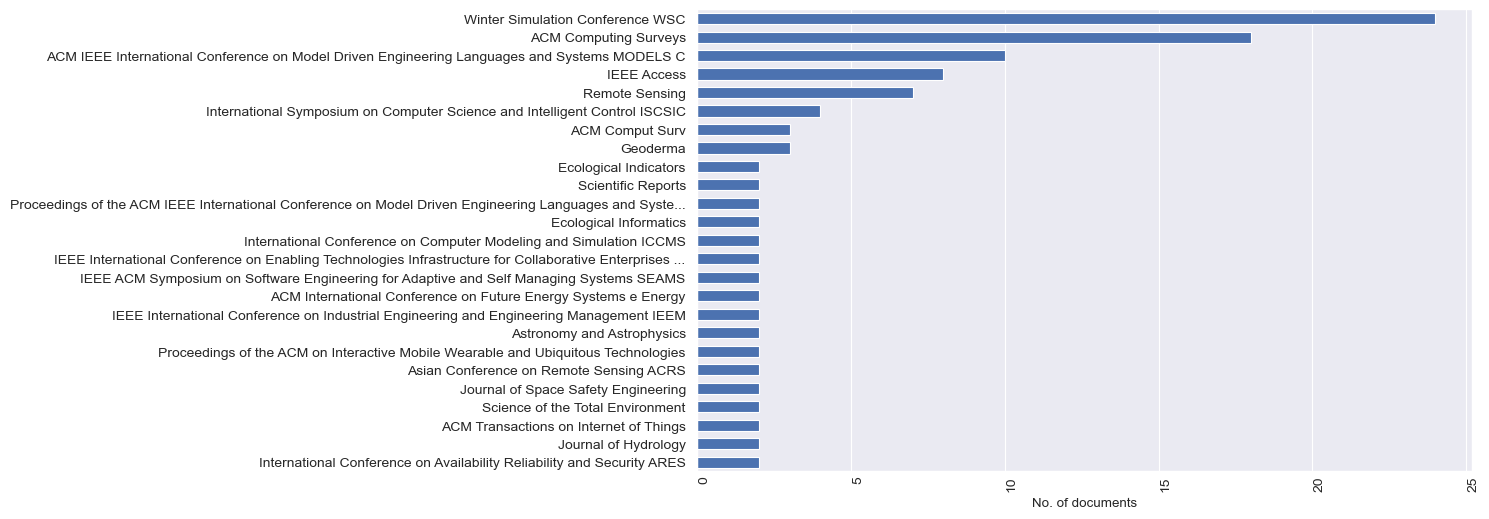

In [11]:
# This names are long, which is why a short abbreviation is provided.
import matplotlib.transforms

# plt.figure(4)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_filtered, vertical=False, label_rotation=0, bar_width=0.6, stacked=True, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_04_plot_source_all_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

import csv

pdStatVenue = litstudy.stats.compute_source_histogram(docs_filtered)
display(pdStatVenue)
pdStatVenue.to_csv('Results/' + str(filename) + '_04_Venues_all.csv')   

In [12]:
docs_journal_all = docs_bib.filter_docs(lambda d: d.source_type == 'Journal'  or d.id.doi == '10.1007/978-3-319-46508-1_13')
# print(len(docs_journal))

pattern_conf = ['conference','symposium','lecture notes','congress','Design, Automation and Test in Europe']
docs_conf_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 ( re.search(pattern_conf[0],str(d.publication_source),re.IGNORECASE) or 
                                   re.search(pattern_conf[1],str(d.publication_source),re.IGNORECASE) or 
                                   re.search(pattern_conf[2],str(d.publication_source),re.IGNORECASE) or
                                   re.search(pattern_conf[4],str(d.publication_source),re.IGNORECASE) or
                                   re.search('studies',str(d.publication_source),re.IGNORECASE) ) and
                                   (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                   (not re.search('companion',str(d.publication_source),re.IGNORECASE)) )

doc_workshop_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                  d.id.doi == '10.24251/HICSS.2017.569') and  
                                        (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                        (re.search('workshop',str(d.publication_source),re.IGNORECASE) or
                                         re.search('companion',str(d.publication_source),re.IGNORECASE) or
                                         re.search('forum',str(d.publication_source),re.IGNORECASE) ) )

doc_book_all = docs_bib.filter_docs(lambda d: d.source_type == 'Book')

pattern_symp = ['symposium','']
docs_symp_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 re.search(pattern_symp[0],str(d.publication_source),re.IGNORECASE) and
                                   (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                   (not re.search('conference',str(d.publication_source),re.IGNORECASE)) )

pattern_forum = ['forum','']
docs_forum_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 re.search(pattern_forum[0],str(d.publication_source),re.IGNORECASE) )

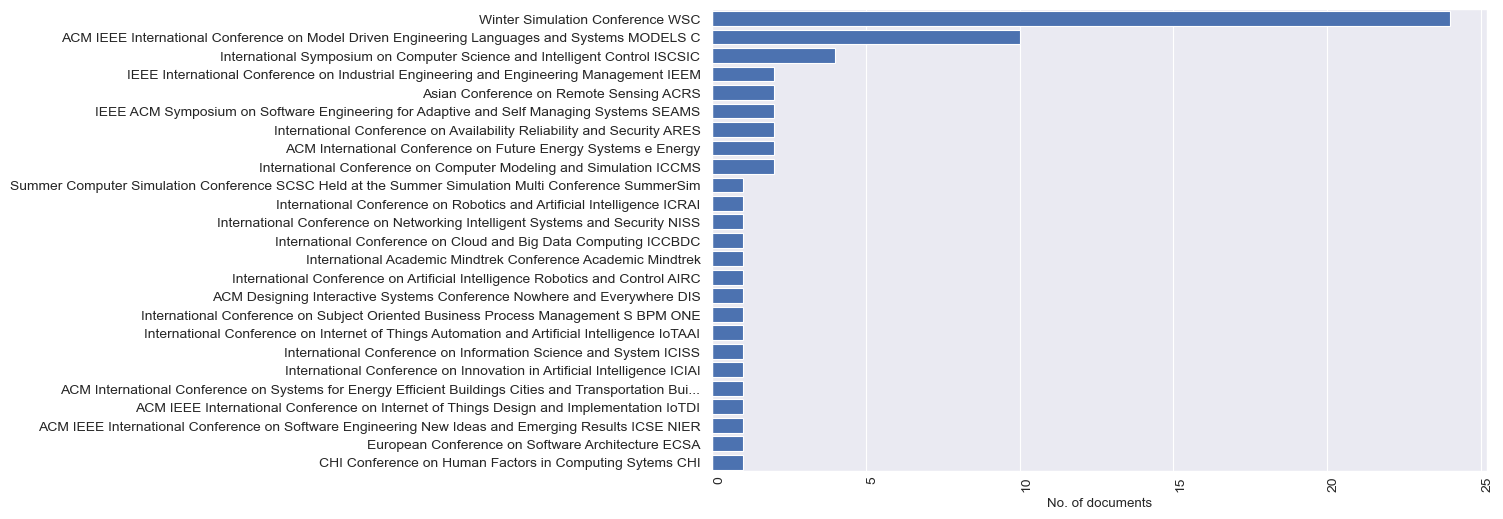

In [13]:
# plt.figure(5)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_conf_all, vertical=False, stacked=True, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_05_plot_source_conf_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

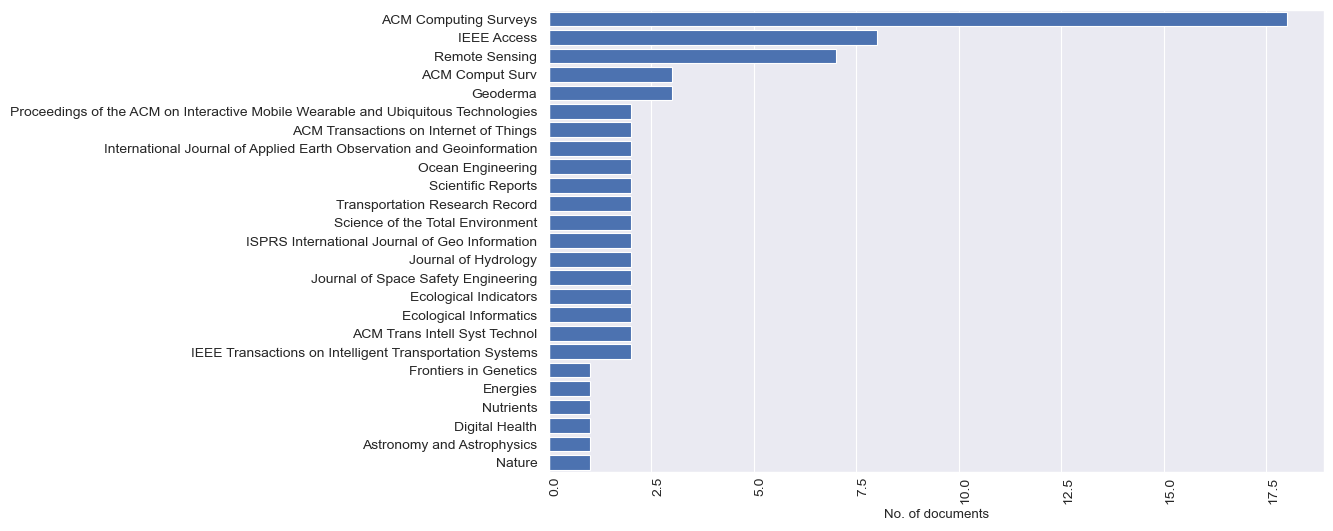

In [14]:
# plt.figure(6)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_journal_all, vertical=False, stacked=True, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_06_plot_source_journal_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

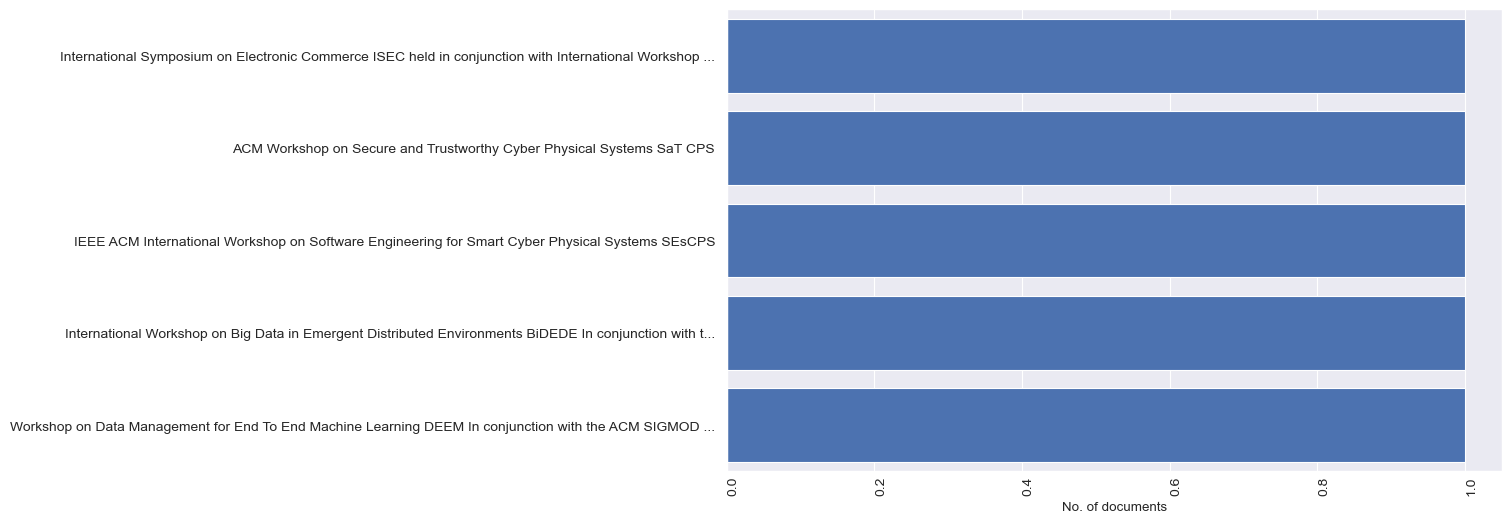

In [15]:
# plt.figure(7)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(doc_workshop_all, vertical=False, stacked=True, limit=50);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_07_plot_source_workshop_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

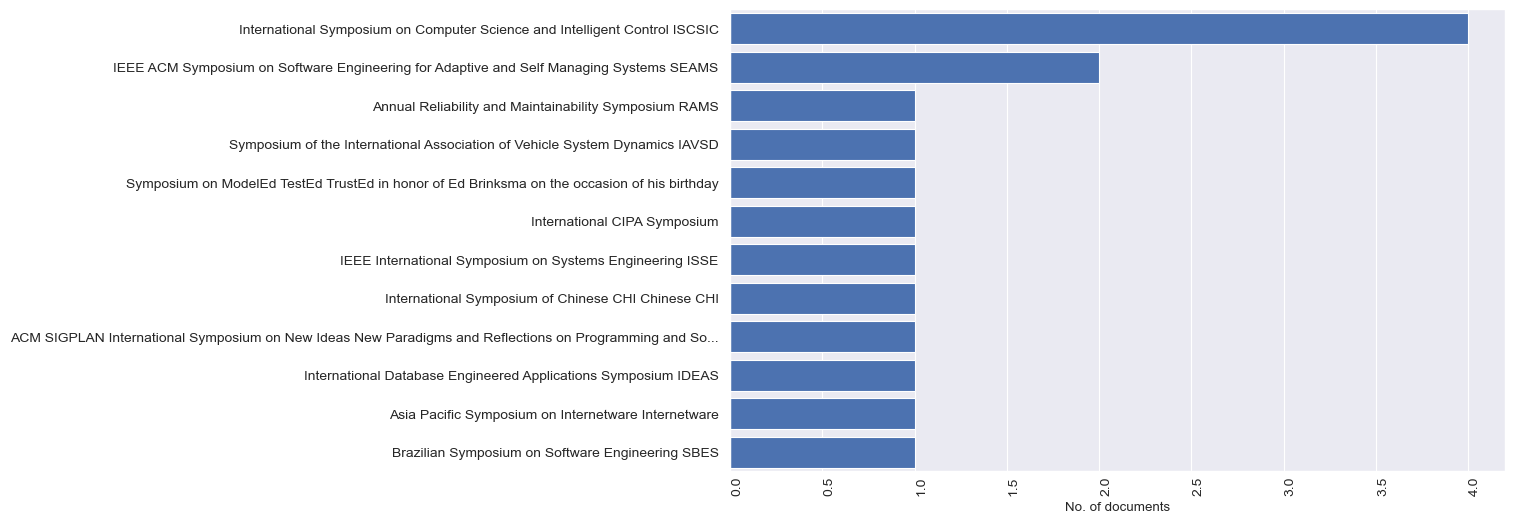

In [16]:
# plt.figure(8)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_symp_all, vertical=False, stacked=True, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_08_plot_source_symposium_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

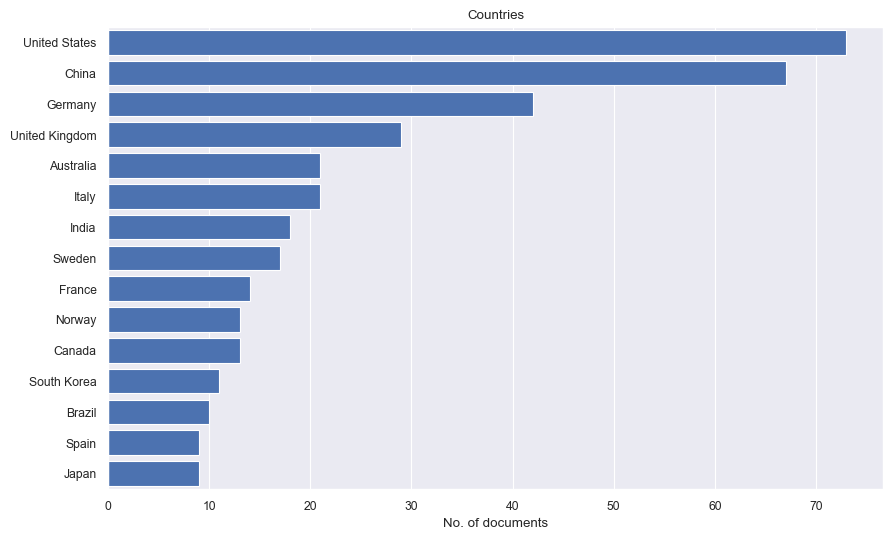

In [17]:
litstudy.plot_country_histogram(docs_filtered, limit=15);

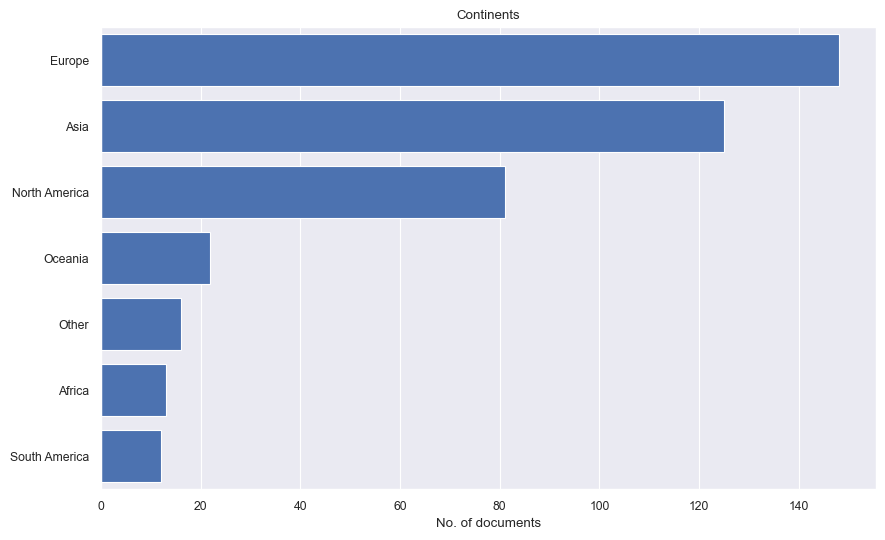

In [18]:
litstudy.plot_continent_histogram(docs_filtered);

# Selected Paper Network Analysis
Litstudy Network analysis

In [19]:
################################ CITATION NETWORK ###############################################
litstudy.plot_network(litstudy.build_citation_network(docs_filtered), smooth_edges=None, max_node_size=25, min_node_size=5, file_name='Results/' + str(filename) + '_09_network_full.html')

Results/SOTA_SECO_CPS_2024-10-10_12-26-0_09_network_full.html


In [20]:
import networkx as nx

bb_full = litstudy.build_citation_network(docs_filtered)

In [21]:
index = 0
data = []

while index < len(bb_full.nodes):
    References = 0
    RefID = ''
    CitedBy = 0
    CitedID = ''
    
    print('Paper', index)
    print('Title:', bb_full.nodes[index].get('title'))
    print('Degree:', bb_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_full.out_edges(index))):
        edgeOut = list(bb_full.out_edges(index))[idx]
        print('Reference Paper:', edgeOut[1])
        RefID = RefID + '<' + str(edgeOut[1]) + '>'
        print('Title:', bb_full.nodes[edgeOut[1]].get('title'))
        
        References += 1
    
    print('References:', References)
    print('\n')
    
    for idx in range(len(bb_full.in_edges(index))):
        edgeIn = list(bb_full.in_edges(index))[idx]
        print('Cited by Paper:', edgeIn[0])
        CitedID = CitedID + '<' + str(edgeIn[0]) + '>'
        print(CitedID)
        print('Title:', bb_full.nodes[edgeIn[0]].get('title'))
        CitedBy += 1
    
    print('Citations:', CitedBy)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_full.nodes[index].get('title'), 'Degree': bb_full.degree[index], 'ReferencesID': RefID, 'TotRef': References, 'CitedByID': CitedID, 'TotCit': CitedBy})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper', 'Title', 'Degree', 'ReferencesID', 'TotRef', 'CitedByID', 'TotCit'])

df.to_excel('Results/' + str(filename) + '_10_CitationGraphFull.xlsx', index=False)

Paper 0
Title: Cloud-Based Battery Digital Twin Middleware Using Model-Based Development
Degree: 1


References: 0


Cited by Paper: 12
<12>
Title: Architecting Digital Twins
Citations: 1


Paper 1
Title: Environment for Education on Industry 4.0
Degree: 1


References: 0


Cited by Paper: 205
<205>
Title: Model-Based System Engineering of the Internet of Things: A Bibliometric Literature Analysis
Citations: 1


Paper 2
Title: Comprehensive Review of Machine Learning, Deep Learning, and Digital Twin Data-Driven Approaches in Battery Health Prediction of Electric Vehicles
Degree: 0


References: 0


Citations: 0


Paper 3
Title: Optimizing transformer parasitics in an inductor-less resonant converter
Degree: 0


References: 0


Citations: 0


Paper 4
Title: NASA's safety, reliability, and mission assurance digital future
Degree: 0


References: 0


Citations: 0


Paper 5
Title: Toward Physics-Informed Machine-Learning-Based Predictive Maintenance for Power Converters-A Review
Degree: 0


In [22]:
######################################### COUPLING NETWORK ########################################
litstudy.plot_coupling_network(docs_filtered, max_edges=150, node_size=10, file_name='Results/' + str(filename) + '_11_co-network_full.html')

Results/SOTA_SECO_CPS_2024-10-10_12-26-0_11_co-network_full.html


In [23]:
import networkx as nx

bb_coup_full = litstudy.build_coupling_network(docs_filtered, max_edges=500)

In [24]:
coup = 0
coupID = ''
coupWeight = ''
    
index = 0
for idx in range(len(bb_coup_full.edges(index))):
        edgeOut = list(bb_coup_full.edges(index))[idx]
        print('Coupling Paper:', edgeOut[1])
        coupID = coupID + '<' + str(edgeOut[1]) + '>'
        print('coupID:',coupID)
        coupWeight = coupWeight + '<' + str(bb_coup_full.get_edge_data(index,edgeOut[1])) + '>'
        print('coupWeight:',coupWeight)
        print('Title:', bb_coup_full.nodes[edgeOut[1]].get('title'))
        coup += 1

Coupling Paper: 12
coupID: <12>
coupWeight: <{'weight': 3, 'score': 3}>
Title: Architecting Digital Twins
Coupling Paper: 233
coupID: <12><233>
coupWeight: <{'weight': 3, 'score': 3}><{'weight': 3, 'score': 3}>
Title: Reference Framework for Digital Twins within Cyber-Physical Systems
Coupling Paper: 149
coupID: <12><233><149>
coupWeight: <{'weight': 3, 'score': 3}><{'weight': 3, 'score': 3}><{'weight': 2, 'score': 2}>
Title: Service Computing for Industry 4.0: State of the Art, Challenges, and Research Opportunities


In [25]:
import networkx as nx

bb_coup_full = litstudy.build_coupling_network(docs_filtered, max_edges=500)

# bb_coup_full.edges
#bb_coup_full.edges(1)
# bb_coup_full.get_edge_data(70,106)

index = 0
data = []
while index < len(bb_coup_full.nodes):
    print(bb_coup_full.edges(index))
    
    coup = 0
    coupID = ''
    coupWeight = ''
    
    print('Paper', index)
    print('Title:', bb_coup_full.nodes[index].get('title'))
    print('Degree:', bb_coup_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_coup_full.edges(index))):
        edgeOut = list(bb_coup_full.edges(index))[idx]
        print('Coupling Paper:', edgeOut[1])
        coupID = coupID + '<' + str(edgeOut[1]) + '>'
        coupWeight = coupWeight + '<' + str(bb_coup_full.get_edge_data(index,edgeOut[1])) + '>'
        print('Title:', bb_coup_full.nodes[edgeOut[1]].get('title'))
        coup += 1
        
    print('Total Coupling Papers:', coup)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_coup_full.nodes[index].get('title'), 'Degree': bb_coup_full.degree[index], 'Coupling Paper': coupID, 'Total Coupling Papers': coup, 'Weight': coupWeight})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper','Title', 'Degree', 'Coupling Paper', 'Total Coupling Papers','Weight'])

df.to_excel('Results/' + str(filename) + '_12_Co-CitationGraphFull.xlsx', index=False)

[(0, 12), (0, 233), (0, 149)]
Paper 0
Title: Cloud-Based Battery Digital Twin Middleware Using Model-Based Development
Degree: 3


Coupling Paper: 12
Title: Architecting Digital Twins
Coupling Paper: 233
Title: Reference Framework for Digital Twins within Cyber-Physical Systems
Coupling Paper: 149
Title: Service Computing for Industry 4.0: State of the Art, Challenges, and Research Opportunities
Total Coupling Papers: 3


[(1, 142), (1, 145), (1, 235), (1, 12), (1, 149), (1, 227)]
Paper 1
Title: Environment for Education on Industry 4.0
Degree: 6


Coupling Paper: 142
Title: A Systematic Review of Data Quality in CPS and IoT for Industry 4.0
Coupling Paper: 145
Title: Blockchain-Based Digital Twins: Research Trends, Issues, and Future Challenges
Coupling Paper: 235
Title: Systematization of Digital Twins: Ontology and Conceptual Framework
Coupling Paper: 12
Title: Architecting Digital Twins
Coupling Paper: 149
Title: Service Computing for Industry 4.0: State of the Art, Challenges, and

In [26]:
################################## TOPIC MODELING ###################################
corpus = litstudy.build_corpus(docs_filtered, remove_words=['state','art','international',
          'publishing','nature','switzerland','association','computing','rights','reserved',
        'owner','author','recent','years','enable','allows','introduce','existing','identify','efficient',
        'literature','respect','update','view','achieved','assessment'], max_tokens=10000, ngram_threshold=0.0001) # custom_bigrams=custom_big

In [27]:
index = 0
while index < len(corpus.dictionary): 
    first_key = list(corpus.dictionary.values())[index]
    print(first_key)
    index += 1 

age
automotive
battery
car
case
case_study
cell
close
cloud
collected
complex
conditions
cycle
development
digital
digital_twin
early
effective
electricity
energy
environment
environmental
estimation
expensive
features
field
following
formulation
framework
gained
generation
good
help
implementation
important
improve
information
life
life_cycle
manufacturing
manufacturing_processes
modules
needs
operation
order
paradigm
phase
potential
procedures
process
production
quality
regard
requirements
review
second
self
stage
states
suitable
supervised
systems
task
test
trends
twin
underlying
usage
vehicles
acquired
address
allow
analyze
assess
automated
carried
challenges
connected
consequently
control
course
critical
cutting
degree
demand
edge
education
electronic
emerging
enabling
engineering
equipment
essential
experiments
exploiting
function
hand
including
incorporating
industrial_internet
industry
institute
integration
interaction
internet
learning
machine
machine_learning
mean
measurement

volume
water
behavior
competition
embedded
force
loop
material
seen
sub
thermal
address_issue
aerial
assignment
automatic
concrete
imagery
inspection
known
point_cloud
progress
sets
synthetic
uav
unmanned
unmanned_aerial
conference
encompasses
factories
fuzzy
licensed
logic
manufacturing_industry
manufacturing_systems
sufficiently
wide_range
efficacy
intention
perceived
prioritize
subject
substantial
airborne
airborne_laser
als
calibration
different_scales
geographic
gis
height
laser
lidar_data
massive
model_compared
mountain
scanning
terrestrial
topography
exclusive_license
tracking
arising
discrepancies
grained
ground
habitat
induced
species
temporal
children
consumption
ecological
food
households
income
personalized
pose
press
simultaneously
carbon
emissions
lessons
tackle
utilised
zero
appears
bridge
exist
geospatial
reality
updated
address_challenges
entities
implies
influential
widespread
cyber
cyber_physical
difficult
difficulties
hardware
translational
classical
reduction
bench

In [28]:
len(corpus.frequencies)

330

In [30]:
indexFREQ = 0
while indexFREQ < len(corpus.frequencies): 
    # print('Paper:',indexFREQ)
    #print('Title:',docs_filtered[indexFREQ].title)
    word_key = list(corpus.frequencies)[indexFREQ]
    index = 0
    data = []
    while index < len(word_key): 
        word = list(corpus.dictionary.values())[(word_key[index][0])]
        #print('Word:',word,' Freq:',word_key[index][1])
        data.append({'Word': word,'Freq': word_key[index][1]})
        index += 1
    
    # Saving first group of data to a single excel file
    df = pd.DataFrame(data, columns=['Word', 'Freq'])

    # Saving first group of data to a single csv file
    df.to_csv('Results/docs/' + str(indexFREQ) + '_word_freq.csv')

    # Saving first group of data to a single excel file
    #df.to_excel('Results/' + filename_xlsx, index=False)
    
    indexFREQ += 1

In [31]:
df_corpus = litstudy.compute_word_distribution(corpus, limit=500).filter(like='_', axis=0).sort_index()
df_corpus
df_corpus.to_csv('Results/' + str(filename) + '_13_abstract_word_freq.csv')

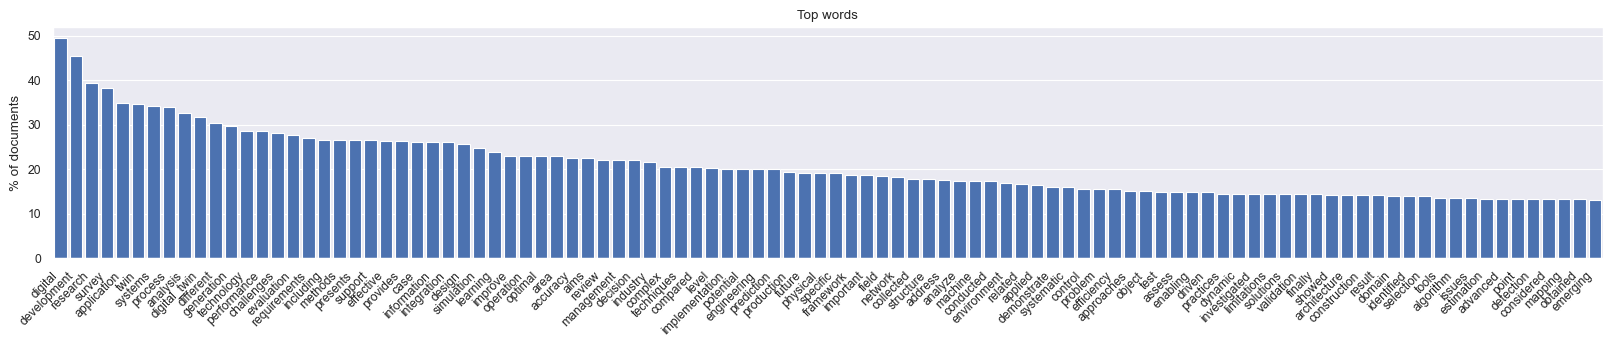

In [32]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, title="Top words", limit=100, vertical=True, label_rotation=45) # limit=25,
plt.savefig('Results/' + str(filename) + '_14_plot_word_distribution_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

In [34]:
###################### ##################
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=500)

In [35]:
import os
if os.path.exists('Results/' + str(filename) + '_15_Topics.txt'):
    os.remove('Results/' + str(filename) + '_15_Topics.txt')

for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i), file=open('Results/' + str(filename) + '_15_Topics.txt', 'a')) # a

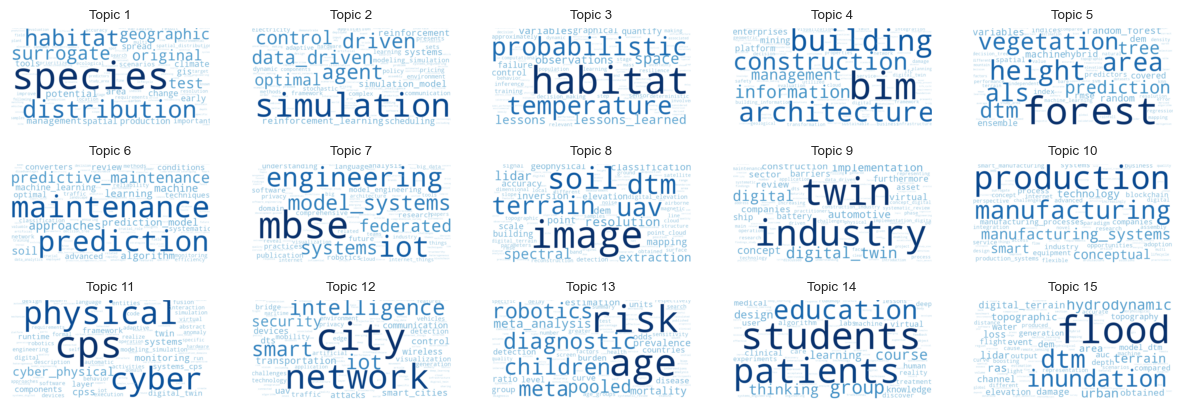

In [36]:
# Plot Topic Clouds
plt.figure(figsize=(15, 5))  # (25 topics: 25, 15), (15 Topics: 15, 5)
# litstudy.plot_topic_clouds(topic_model, ncols=5) 
litstudy.plot_topic_clouds(topic_model, ncols=5) 
plt.savefig('Results/' + str(filename) + '_16_plot_topic_clouds.png', dpi=300, bbox_inches='tight', format="PNG")

In [37]:
for doc_id in topic_model.best_topic_for_documents():
    index = int(doc_id)
    print(f'Topic n. {index} for: "', docs_filtered[index].title, '"')

Topic n. 8 for: " Lyricist Identification using Stylometric Features utilizing BanglaMusicStylo Dataset "
Topic n. 8 for: " Lyricist Identification using Stylometric Features utilizing BanglaMusicStylo Dataset "
Topic n. 5 for: " Toward Physics-Informed Machine-Learning-Based Predictive Maintenance for Power Converters-A Review "
Topic n. 1 for: " Environment for Education on Industry 4.0 "
Topic n. 3 for: " Optimizing transformer parasitics in an inductor-less resonant converter "
Topic n. 5 for: " Toward Physics-Informed Machine-Learning-Based Predictive Maintenance for Power Converters-A Review "
Topic n. 11 for: " Increase Patients' Survivability During Emergency Care Using Blockchain-Based Digital Twin Technology "
Topic n. 8 for: " Lyricist Identification using Stylometric Features utilizing BanglaMusicStylo Dataset "
Topic n. 4 for: " NASA's safety, reliability, and mission assurance digital future "
Topic n. 8 for: " Lyricist Identification using Stylometric Features utilizing 

In [38]:
for i in range(num_topics):
    topic_id = int(i)
    print(f'Topic n. {topic_id} for: "', topic_model.best_tokens_for_topic(topic_id), '"\n')
    for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
        print(docs_filtered[int(doc_id)].title)
    print('\n')

Topic n. 0 for: " ['species', 'distribution', 'habitat', 'surrogate', 'geographic'] "

Assessing the use of surrogate species for a more cost-effective traceability of geographic origin using elemental fingerprints of bivalve shells
Forecasting weed distributions using climate data: A GIS early warning tool
Evaluating the effect of vegetation index of SPOT imagery on the accuracy of castanopsis carlesii potential habitat model
Evaluate the performance of ecological niche modeling for the hbitat of japanese elaeocarpus
Dissolved organic carbon trends resulting from changes in atmospheric deposition chemistry
High resolution site index prediction in boreal forests using topographic and wet areas mapping attributes
Accelerated Safety Testing for Highly Automated Vehicles: Application and Capability Comparison of Surrogate Models
Multi-Vehicle Interactive Lane-Changing Velocity Change Model Based on Potential Energy Field
Demand Profiling for Dynamic Traffic Assignment by Integrating Depar